In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Libaries
from scipy.stats.stats import pearsonr   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from bokeh.plotting import figure as b_figure
from bokeh.models import ColumnDataSource
from bokeh.models import Legend, LegendItem
from bokeh.models import Range1d
from bokeh.palettes import Spectral6
from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.layouts import layout
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import curdoc
import matplotlib.lines as mlines
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import plotly.express as px
from urllib.request import urlopen
import json
import geopandas as gpd
from IPython.core.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot as px_plot
config={'showLink': False, 'displayModeBar': False}

init_notebook_mode()


import math
%matplotlib inline

In [ ]:
data = pd.read_csv("NYCgov_Poverty_Measure_Data__2015_.csv")

# Adding column for age-group
bins= np.arange(0,110,10)
labels = ['(' + str(x)+'-'+str(x+10)+']' for x in bins[:-1]]
labels[-1] = labels[-1].replace("100]", "inf)")
data['AgeGroup'] = pd.cut(data['AGEP'], bins=bins, labels=labels, right=True)

# Create dataframe with only adults (finished school)
data_adult = data[data['AGEP'] > 24]

# Mapping of different columns 
EducAttain_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}
SEX_map = {1: 'Male', 2:'Female'}
Boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}
Off_Pov_Stat_map = {1:'In Poverty',2:'Not in Poverty'}
Ethnicity_map = {1:'Non-Hispanic White',2:'Non-Hispanic Black',3:'Non-Hispanic Asian',
    4:'Hispanic, Any Race',5:'Other Race/Ethnic Group'}


# Adding column of total income 
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

# Creating a predictive model that should be bad a predictor (but isn't)

Imagine you're a school principle and would like to find out which aspirering new kids will attain some level of college education later in life. You do this so you don't have to waste any time and recourses on people you believe are ultimately undeserving. To do this you gather all the information you can about your new students like: **Borough** (location), **Disability**, **languages other than English spoken**, **Ethnicity** and **Sex**.   

Ultimately this is a list of attributes that really should not have any influence on the level of educaction an individual will obtain, which is why the ML model used to predict this is hopefully bad.  
Interestingly we would expect **languages other than English spoken** to have a negative impact on the level of education attained, as the majority of Americans only speak English, thus speaking another language than English is an indication the person is of another race. Of course, attributes like **Ethnicity** and **Sex** having an influence on education would go directly against SDGs 4, and 5.   

# Heat maps del her !??!?!
Finally, looking at the heat maps !?!??!!? we see that there are concentrations of ?!?!?!?! ?in =!=!=!=!=!, thus **Borough** having an impact on education, is another way of saying **Ethnicity** has an impact. Additionally, we know that a community (**Borough**) has a positive feedback loop in either direction, so higher education leads to even higher education and vice versa !)!))")#=)!"=)#="! see heat map !="?!"?#=!"?€=!"€=€!"?=€!"€?=. 

### Classification model
The process of predicting whether an individual will attain some college education or not is called a classification model, and our classification model consists of decision trees.

A decision tree works by asking "yes/no" questions, for instance: "Is this person a male?". This creates a split in the tree. Based on the answer to the question a new question is asked on each branch, creating new splits. Multiple splits are created in this way, such that for each split we get more and more information about our data. We select the questions such that the two resulting subgroups from the split are as different as possible, and the data points within each subgroup are as similar as possible. To calculate this we can use a measure called entropy. Finally, we have split the data into multiple subgroups, where for each subgroup there will be a higher probability of predicting the right target class, than if we had not asked any questions. 

We then create multiple of these decision trees, all different and uncorrelated. To do a prediction we can then combine these decision trees and predict what most of the trees are predicting. This is what is called a random forest. The random forest minimizes errors in the classification because we get inputs from multiple decision trees, hence one wrong tree prediction will not make a difference as long as most trees predict correctly. 

Finally, we are also performing a randomized search to select the best random forest model. The randomized search simply creates multiple random forest models with different parameters such as "number of trees in each forest", "maximum number of levels in each tree" etc. It then runs and evaluates all models, selecting the random forest which performs best.

### Random forest model results
The binary classification model we have created "unfortunately" performs rather well. Unfortunately, this indicates external factors such as race, disability, location, etc. have an impact on achieving higher education in New York City. It means that we based on a person's rather neutral features can predict whether or not this person has an education (or will get one). It is a feature that we believe should not have an influence on whether or not a person will receive higher education. 
We can compare our model to a baseline model, which predicts everyone to have higher education. Whereas our model makes a prediction for each person based on the previously mentioned features.

We get the following statistical performance measurements for the random forest model and the baseline model respectively:

**Random Forest Classifier**
Performance Measurement|Performance
---|---
Accuracy| 0.65 <br>
Precision| 0.67 <br>
Recall| 0.79 <br>
F1 score| 0.73

**Baseline model**
Performance Measurement|Performance
---|---
Accuracy| 0.59 <br>
Precision| 0.59 <br>
Recall| 1.00<br> 
F1 score| 0.74 <br>

095u1309urqonfaoioifanoinaoifnasfoinn

# Ændre tal 

asoifasiojfoiasjfoisj 

These measures are all in the range of zero to one, where zero is the worst and 1 is the best.
We see that the random forest model has the best accuracy and precision, whereas the baseline model has a better recall and f1 score. 
The accuracy is a measure of how many correct predictions are divided by the total amount of predictions. Hence our random forest model overall does predict more correctly than the baseline model. Precision and recall are two measures often seen together. One way to explain them is that precision is a measure of quality and recall is a measure of quantity.[[precision, recall wiki]](https://en.wikipedia.org/wiki/Precision_and_recall). Because precision tells you how many of the higher education predictions are correct, and recall tells you how many of the higher education instances you predicted correct (also known as True positive ([TP](https://en.wikipedia.org/wiki/Sensitivity_and_specificity))). So naturally when predicting every instance to be higher education, the recall will be 1.

Finally, the f1 score is a mean between the two measurements.  
Hence to evaluate the model we need to look at what the model should be used for. If we assume a rather uncomfortable thought that the NYC government would predict who gets education in order to know which people to spend recourses on, then their goal is probably to only invest in the people who get higher education. And not invest in a person and risk investing in someone who does not get the education. Here they would prefer a higher precision over a higher recall because this indicated that they seldom invest in the wrong people, but rather invest a little less, though they will miss some potential good investments. Hence in this case our model would actually be useful.  

The above-stated thought is morally uncomfortable, but nonetheless, it is the sad truth, that we based on the data of the NYC situation in 2015 can see the segregation from the model and could use people's neutral features to predict education.

Talking about segregation we can look into our model to see if it is biased, and in which areas it is most biased. In our case, we know that the model is biased since we only included features that should not have an influence. But we can take a look at which features have the most influence, and hence where the model is most biased. Therefore we have plotted the importance of the different features. This is simply a measure of how important each feature is for the prediction. 

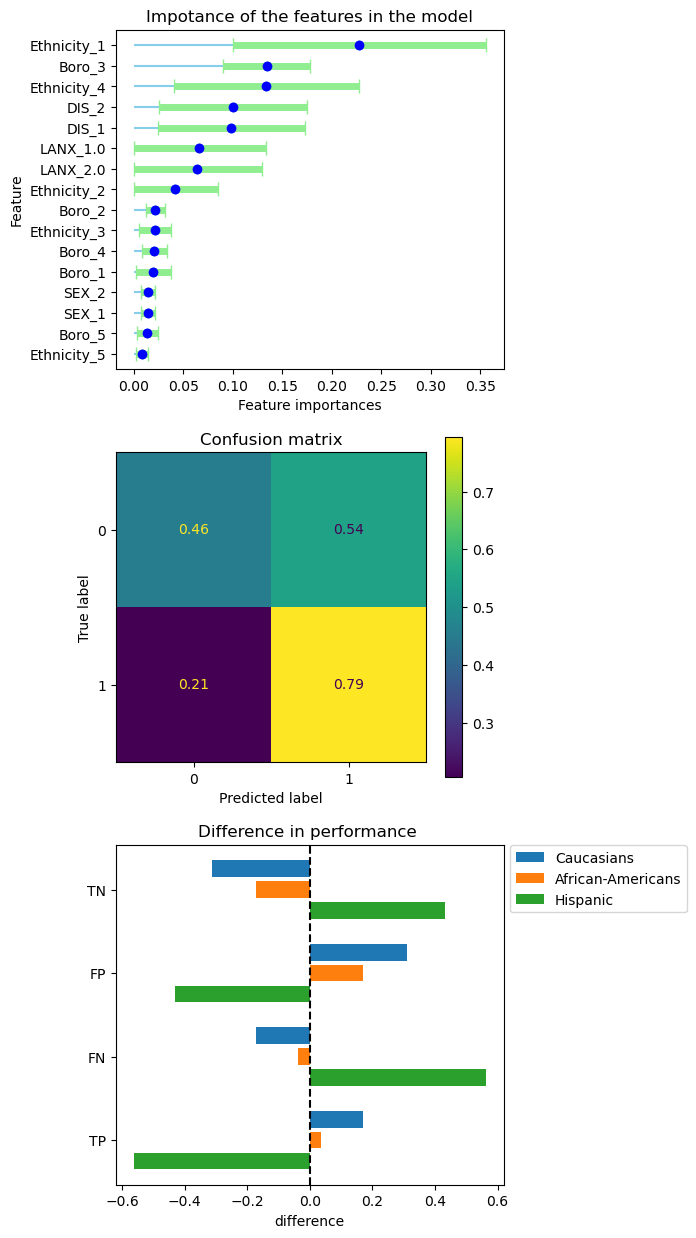

In [ ]:
### ML Model 

# Data prep
y_debias = data_adult['EducAttain']>2
# Selecting data for ML model
features_debias = ['Ethnicity', 'SEX', 'Boro', 'LANX', 'DIS']
X_debias = data_adult[features_debias]
# Drop row with missing values
X_debias = X_debias.dropna()
## Transform data
X_debias = pd.get_dummies(X_debias, columns=['Ethnicity','SEX','Boro','LANX','DIS']) 

# Splitting in train/test sets
X_train_debias, X_test_debias, y_train_debias, y_test_debias = train_test_split(X_debias, y_debias, test_size=0.30, stratify=y_debias, random_state=42)

## Randomized Search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier()

# Randomized search - Tager lang tid at køre!!!
#rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Normal rf med bedste parametre
rf_debias = RandomForestClassifier(n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=False, random_state=42)

# Fit the random search model
#rf_random.fit(X_train_debias,y_train_debias)
rf_debias.fit(X_train_debias,y_train_debias)
#print(rf_random.best_params_)
#best_random = rf_random.best_estimator_

## Making predictions 
#y_pred_rf_debias = best_random.predict(X_test_debias)
y_pred_rf_debias = rf_debias.predict(X_test_debias)

## Evaluating RandomForestClassifier
#print("RandomForestClassifier:")
#print("Accuracy is %f" % accuracy_score(y_test_debias,y_pred_rf_debias))
#print("Precision is %f" % precision_score(y_test_debias,y_pred_rf_debias))
#print("Recall is %f" % recall_score(y_test_debias,y_pred_rf_debias))
#print("F1 score is %f" % f1_score(y_test_debias,y_pred_rf_debias))

# Baseline model - All predictions true
#print("Baseline model:")
#print("Accuracy is %f" % accuracy_score(y_test_debias, np.full((len(y_test_debias), 1), True)))
#print("Precision is %f" % precision_score(y_test_debias, np.full((len(y_test_debias), 1), True)))
#print("Recall is %f" % recall_score(y_test_debias, np.full((len(y_test_debias), 1), True)))
#print("F1 score is %f" % f1_score(y_test_debias, np.full((len(y_test_debias), 1), True)))
#print(TPR_FPR(y_test_debias, np.full((len(y_test_debias), 1), True)))

y_hat = y_pred_rf_debias
y_prob = rf_debias.predict_proba(X_test_debias)[:,1]

## Index for Caucasians
CA_index = X_test_debias['Ethnicity_1']==1
y_probs_CA = y_prob[CA_index]
y_test_CA = y_test_debias[CA_index]

# Index for Hispanic
HI_index = X_test_debias['Ethnicity_4']==1
y_probs_HI = y_prob[HI_index]
y_test_HI = y_test_debias[HI_index]

# Index for African American
AA_index = X_test_debias['Ethnicity_2']==1
y_probs_AA = y_prob[AA_index]
y_test_AA = y_test_debias[AA_index]

# Thresholds
ths = np.linspace(1e-5,1-1e-5,20)

### Feature importance
# Create a dataframe
std_rf = np.std([tree.feature_importances_ for tree in rf_debias.estimators_], axis=0)
df_fi = pd.DataFrame({'group':list(X_train_debias.columns), 'values':rf_debias.feature_importances_, 'std':std_rf })
df_fi['up'] = df_fi['std']
df_fi['low'] = df_fi['values'] - df_fi['std']
df_fi.loc[df_fi['low'] >= 0,'low'] = df_fi.loc[df_fi['low'] >= 0,'std']
df_fi.loc[df_fi['low'] < 0,'low'] = df_fi.loc[df_fi['low'] < 0,'values']


# Reorder it based on the values
ordered_df = df_fi.sort_values(by='values')
my_range=range(1,len(df_fi.index)+1)

fig, axs = plt.subplots(3,figsize=(5,15))

# The horizontal plot is made using the hline function
axs[0].hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
axs[0].plot(ordered_df['values'], my_range, "o")
axs[0].errorbar(ordered_df['values'], my_range, xerr = np.array([ordered_df['low'], ordered_df['up']]), fmt = 'o', color = 'blue', 
            ecolor = 'lightgreen', elinewidth = 5, capsize=5)

 
# Add titles and axis names
#plt.yticks(my_range, ordered_df['group'])
axs[0].set_yticks(my_range)
axs[0].set_yticklabels(ordered_df['group'])
axs[0].set_title("Impotance of the features in the model")
axs[0].set_xlabel('Feature importances')
axs[0].set_ylabel('Feature')


# Creating confusion matrix
TN_tot, FP_tot, FN_tot, TP_tot = confusion_matrix(y_test_debias, y_hat, normalize='true').ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_debias, y_hat, normalize='true'))
disp.plot(ax = axs[1])
axs[1].set_title('Confusion matrix')


plt.rcdefaults()

## Compute the difference in confusion matrix
y_hat_AA_bf = y_hat[AA_index]
y_hat_CA_bf = y_hat[CA_index]
y_hat_HI_bf = y_hat[HI_index]

DTN_ca, DFP_ca, DFN_ca, DTP_ca = (confusion_matrix(y_test_CA, y_hat_CA_bf,normalize='true') - confusion_matrix(y_test_debias, y_hat,normalize='true')).ravel()
DTN_aa, DFP_aa, DFN_aa, DTP_aa = (confusion_matrix(y_test_AA, y_hat_AA_bf,normalize='true') - confusion_matrix(y_test_debias, y_hat,normalize='true')).ravel()
DTN_hi, DFP_hi, DFN_hi, DTP_hi = (confusion_matrix(y_test_HI, y_hat_HI_bf,normalize='true') - confusion_matrix(y_test_debias, y_hat,normalize='true')).ravel()

## Difference in TP etc. 
people = ('TN','FP', 'FN', 'TP')
y_pos = np.arange(len(people))*4
performance_ca = [DTN_ca, DFP_ca, DFN_ca, DTP_ca ]
performance_aa = [DTN_aa, DFP_aa, DFN_aa, DTP_aa ]
performance_hi = [DTN_hi, DFP_hi, DFN_hi, DTP_hi ]

axs[2].barh(y_pos, performance_ca, align='center', label = 'Caucasians')
axs[2].barh(y_pos+1, performance_aa, align='center', label ='African-Americans')
axs[2].barh(y_pos+2, performance_hi, align='center', label ='Hispanic')
axs[2].set_yticks(y_pos+1)
axs[2].set_yticklabels(people)
axs[2].invert_yaxis()  # labels read top-to-bottom
axs[2].set_xlabel('difference')
axs[2].set_title('Difference in performance ')
axs[2].axvline(x=0, color = 'black', linestyle = '--')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.show()

We see that *ethnicity_1* ("Non-Hispanic White") is the most important, and *ethnicity_4* ("Hispanic, Any Race") is the third most important. (With *Boro_3*, which is Manhattan being the second most important). Hence the model sees the person's race as an important attribute to predict the education level attained. This does not seem fair.  
Luckily the sex does not seem that important, which is exactly what we saw in 
# reference til plot her.  

Next, we have plotted the normalized confusion matrix of the model's overall performance. It shows the ratio between the actual educational status and the predicted educational status. These numbers are used to calculate the statistics we use to evaluate the model before. From the matrix we see that our model is better at predicting the people who do get an education than the people who don't get an education. Hence the model leans towards predicting that people will get a higher level education. 

Finally, we go back and look if our concern about the model being very biased towards race holds true. To investigate this we have plotted the difference in the performance of the model for three ethnicities: Caucasian, African-American, and Hispanic.

# om vi gøre dettte eller ej, altså for 2 eller 3 ethnicities

On the y-axis we have the different labels TN (true negative: correctly predicted no higher education), FP (false positive: predicted higher education, but had no higher education), FN (false negative: predicted no higher education, but had higher education), and TP (true positive: correctly predicted higher education). The x-axis shows the difference between the chosen race and the overall model, which is not divided.  
From the plot, we see that for the Caucasians the model has much fewer true negatives and false negatives, and a lot more false positives and true positives. This means the model very seldom predicts a white person not to have an education, and most frequently predicts Caucasians to have a higher education. For Hispanic and African-American people we see an opposite trend. Meaning the model tends towards predicting black and Hispanic people don't have an education. 
Hence we were right in our concern about the bias in the model. This bias is simply due to the data being biased, indicating racial segregation in the city of New York. This is an unfortunate fact we cannot change.  

But if we would use the model to predict education and do not want the model to be unfair to some races, we can debias the model according to the race. We have chosen Caucasian and Hispanic, since these are the most influential, and included African-American as well since there is a lot of history regarding black peoples' educational rights (and of course rights in general). The idea behind debiasing is to make the model equally fair for all races. The way we wish to make the model fair is by getting a similar true positive rate $(\frac{TP}{TP+FN})$ and false positive rate $(\frac{FP}{FP+TN})$ for the races. Ideally, we want a high true positive rate and a low false positive rate. 

For our current overall model we have a TPR (true positive rate) of 0.79, and an FPR (false positive rate) of 0.54. But for the CAucasians, both of these measurements are higher, and for the Hispanics, both are much lower. 
We cannot change the model, but we can change how the model predicts. The model gives each person a probability of that person having a higher education. Normally if the probability is above 0.5 (50%), it predicts the person to have a higher education, if it's under it predicts the person to not have a higher education. The probability of 0.5 is called the threshold. To debias the model we can change the threshold based on which race we are looking at. We will find which thresholds give us the best and most similar TPR's and FPR's for whites and Hispanics respectively. 

To do this we've calculated TPR's and FPR's for both races for some different thresholds. We then plot the FPR on the x-axis and the TPR on the y-axis, where each point corresponds to a threshold. This is called a RUC curve. 

In [ ]:
# Defining functions

def y_hat_th(y_probs,th):
    temp = np.zeros(len(y_probs))
    temp[y_probs > th] = 1
    return temp

def TPR_FPR(y,y_hat):
    TN, FP, FN, TP = confusion_matrix(y, y_hat).ravel()
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    return TPR, FPR

def roc_curve(y, y_probs, ths):
    roc = np.array([])
    for th in ths:
    #convert y_prob in y_hat
        y_hat = y_hat_th(y_probs,th)
        #compute TPR and FPR
        TPR, FPR = TPR_FPR(y, y_hat)
        #add threshold and point to roc array
        roc = np.append(roc, [th, FPR, TPR])
    #return roc
    return roc.reshape(-1, 3)

# This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order 
def closest_points(points1, points2):
    #initialize result
    res = list()
    #loop over points in group 1
    for pi in points1:
        #loop over points in group 2
        for pj in points2:
        #add points and their distance to res
            res.append(((pi, pj), np.linalg.norm(pi[1:] - pj[1:])))
    #return sorted result
    return sorted(res, key = lambda x: x[1])

output_notebook()

roc_HI = roc_curve(y_test_HI,y_probs_HI,ths)
roc_CA = roc_curve(y_test_CA,y_probs_CA,ths)
roc_AA = roc_curve(y_test_AA,y_probs_AA,ths)

df_roc = pd.DataFrame({'FPR_HI':roc_HI[:,1],'TPR_HI':roc_HI[:,2], 'FPR_CA': roc_CA[:,1], 'TPR_CA': roc_CA[:,2], 
'FPR_AA': roc_AA[:,1], 'TPR_AA': roc_AA[:,2], 'ths_CA': roc_CA[:,0],'ths_HI': roc_HI[:,0], 'ths_AA': roc_AA[:,0] })
CDS_data = ColumnDataSource(data=df_roc)

#Choose a title
title = 'Education based on race'

#Create a plot — set dimensions, toolbar, and title
HOVER_TOOLTIPS = [
        ('Threshold_CA', '@ths_CA'),
        ('Threshold_HI', '@ths_HI'),
        ('Threshold_AA', '@ths_AA')
]


p = b_figure(tooltips = HOVER_TOOLTIPS,
    tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            title=title,
            x_axis_label = "FPR", 
            y_axis_label = "TPR")

p.line(x="FPR_HI", y="TPR_HI", line_width=2, source=CDS_data, color ='red', legend_label='Hispanic')
p.line(x="FPR_CA", y="TPR_CA", line_width=2, source=CDS_data, color = 'green', legend_label = 'Caucasian')
p.line(x="FPR_AA", y="TPR_AA", line_width=2, source=CDS_data, color = 'blue', legend_label = 'African American')

p.circle(x="FPR_HI", y="TPR_HI", radius=0.01, alpha=0.75, source=CDS_data,color ='red')
p.circle(x="FPR_CA", y="TPR_CA", radius=0.01, alpha=0.75, source=CDS_data,color = 'green')
p.circle(x="FPR_AA", y="TPR_AA", radius=0.01, alpha=0.75, source=CDS_data,color = 'blue')

p.legend.location = "right"

show(p)

#print(TPR_FPR(y_test_debias, y_pred_rf_debias))
#print(TPR_FPR(y_test_CA, y_hat_CA_bf))
#print(TPR_FPR(y_test_HI, y_hat_HI_bf))

# TPR and FPR with new thresholds
y_hat_HI_th = y_hat_th(y_probs_HI,0.421)
y_hat_CA_th = y_hat_th(y_probs_CA,0.684)
y_hat_AA_th = y_hat_th(y_probs_AA,0.526)
#print(TPR_FPR(y_test_AA, y_hat_AA_th))
#print(TPR_FPR(y_test_CA, y_hat_CA_th))
#print(TPR_FPR(y_test_HI, y_hat_HI_th))
#print(accuracy_score(y_test_AA, y_hat_AA_th))
#print(accuracy_score(y_test_CA, y_hat_CA_th))
#print(accuracy_score(y_test_HI, y_hat_HI_th))

Loading BokehJS ...

Evaluating the RUC curve visually, we want to find a high TPR, low FPR, and three thresholds (points) that are close to each other making the rates for the races similar. 
We have selected the following three thresholds: 

African-American: 0.53  
Caucasian: 0.68  
Hispanic: 0.42 

# dette skal nok tjekkes mht. værdier

This means that for African-Americans the probability needs to be above 0.47 to predict higher education, whereas for Caucasians it needs to be above 0.64, and for Hispanics it only needs to be above 0.37.

The specific values for the thresholds that debiases our model reveals how segregated the population is. We see how much we need to change the threshold according to eachother in other to achieve a fair model. Specifically, the threshold for Hispanics is almost two thirds of Caucasians. 

We can now take a look at the effect of our debiasing. To do this we have plotted the TPR and FPR for each race, before and after the debiasing, to see how we have minimized the difference between the races.

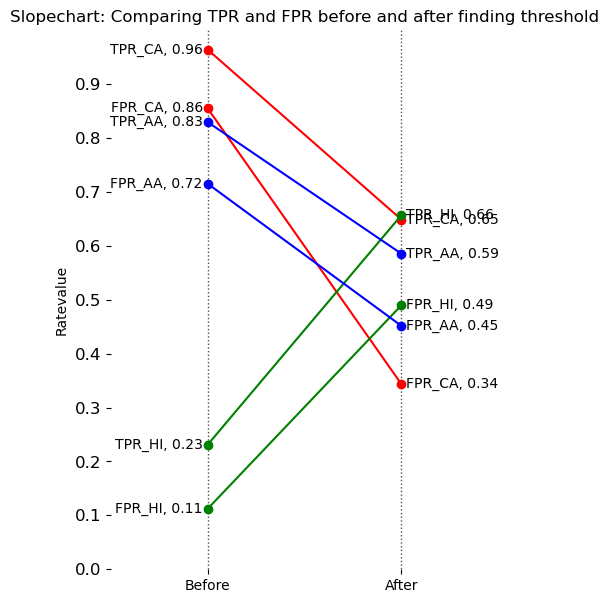

In [ ]:
fig, axs = plt.subplots(1,figsize=(5,7))

## Slope plot
# Import Data
TPR_CA, FPR_CA = TPR_FPR(y_test_CA, y_hat[CA_index])
TPR_HI, FPR_HI = TPR_FPR(y_test_HI, y_hat[HI_index])
TPR_AA, FPR_AA = TPR_FPR(y_test_AA, y_hat[AA_index])

A_TPR_CA, A_FPR_CA = TPR_FPR(y_test_CA, y_hat_CA_th)
A_TPR_HI, A_FPR_HI = TPR_FPR(y_test_HI, y_hat_HI_th)
A_TPR_AA, A_FPR_AA = TPR_FPR(y_test_AA, y_hat_AA_th)

df = pd.DataFrame({'Name':['TPR_CA', 'FPR_CA', 'TPR_HI', 'FPR_HI', 'TPR_AA', 'FPR_AA'],'Before':[TPR_CA,FPR_CA,TPR_HI,FPR_HI, TPR_AA, FPR_AA], "After":[A_TPR_CA,A_FPR_CA,A_TPR_HI,A_FPR_HI, A_TPR_AA, A_FPR_AA]})

left_label = [str(c) + ', '+ str(round(y,2)) for c, y in zip(df.Name, df['Before'])]
right_label = [str(c) + ', '+ str(round(y,2)) for c, y in zip(df.Name, df['After'])]
klass = ['red' if (y1-y2) > 0 else 'green' for y1, y2 in zip(df['Before'], df['After'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=color, marker='o', markersize=6)
    ax.add_line(l)
    return l

# Vertical Lines
axs.vlines(x=1, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
axs.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
axs.scatter(y=df['Before'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
axs.scatter(y=df['After'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
i = 0
for p1, p2, c in zip(df['Before'], df['After'], df['Name']):
    if (i < 2):
        newline([1,p1], [3,p2], color = 'red')
    elif (i <4):
        newline([1,p1], [3,p2], color = 'green')
    else:
        newline([1,p1], [3,p2], color = 'blue')
    i += 1
    axs.text(1-0.05, p1, c + ', ' + str(round(p1,2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    axs.text(3+0.05, p2, c + ', ' + str(round(p2,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# Decoration
axs.set_title("Slopechart: Comparing TPR and FPR before and after finding threshold", fontdict={'size':12})
axs.set(xlim=(0,4), ylim=(0,1), ylabel='Ratevalue')
axs.set_xticks([1,3])
axs.set_xticklabels(["Before", "After"])
plt.yticks(np.arange(0, 1, 0.1), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

Hence after debiasing our chosen thresholds results in the following rates:

| | TPR | FPR |
| :- | -: | :-: |
| African-american | 0.59 | 0.45 |
| Caucasian | 0.65 | 0.34 |
| Hispanic | 0.66 | 0.49 |

So now we have a quite fair model regarding the ethnicities (the rates are almost similar for the three race), and it performs rather okay. The TPR are certainly higher than the FPR, hence it predicts correct more than it predicts wrong.